# 1. Project Overview: Predicting Price of Samsung Phone
## Goal:
The primary goal of this project is to build a machine learning model that can accurately predict the cost of new samsung phones. The project aims to leverage the camera, storage, color and type(variety) to create a predictive model that can help you evaluate the cost of a new one as it release


## Data:
The data is fetched from kaggle's [Samsung phone data](https://www.kaggle.com/datasets/gyanprakashkushwaha/samsung-mobiles-latest-dataset) a comprehensive collection of Samsung smartphones providing valuable insights into Samsung's cutting-edge range of mobile devices. This dataset is a result of meticulous web scraping from trusted sources, including official Samsung websites and reputable online retailers.

In [3]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [4]:
df=pd.read_csv("samsungMobilesData.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/samsungMobilesData.csv'

####Columns
-name: Names of various Samsung smartphone models, showcasing the diversity and variety of offerings.

-ratings: User ratings and reviews associated with each model, reflecting customer satisfaction and feedback.

-price: Prices of the Samsung mobiles, helping users understand the affordability and value proposition of each device.

-imgURL: Image URLs corresponding to each model, facilitating visual exploration and comparison.

-storage_ram: Details about the storage capacity and RAM configuration for each device, crucial for storage-intensive applications.

-os_processor: Operating system and processor details, essential for assessing device performance and capabilities.

-camera: Information about the camera specifications, catering to photography enthusiasts and content creators.

-display: Display-related specifications, such as size, resolution, and technology, offering insights into the visual experience provided by each Samsung mobile.

-battery: Battery-related specifications, including capacity and endurance, vital factors for heavy users and on-the-go productivity.

In [ ]:
#checking the datatypes
df.dtypes

name                object
ratings            float64
price                int64
imgURL              object
camera               int64
display             object
battery              int64
storage              int64
ram                  int64
processor           object
android_version      int64
dtype: object

In [ ]:
#checking the null values
df.isna().sum()

name               0
ratings            0
price              0
imgURL             0
camera             0
display            0
battery            0
storage            0
ram                0
processor          0
android_version    0
dtype: int64

#2. Data Cleaning and  Exploratory Data Analysis

In [ ]:
#checking the name column
a=df['name'].value_counts()
a

SAMSUNG Galaxy A12 (Blue, 128 GB)                               4
SAMSUNG Galaxy M32 5G (Sky Blue, 128 GB)                        4
SAMSUNG Galaxy M34 5G without charger (Prism Silver, 128 GB)    3
SAMSUNG Galaxy A22 5G (Gray, 128 GB)                            3
SAMSUNG Galaxy M32 5G (Slate Black, 128 GB)                     3
                                                               ..
SAMSUNG Galaxy On Nxt (Black, 64 GB)                            1
SAMSUNG Galaxy Z Flip4 5G (Bora Purple, 128 GB)                 1
SAMSUNG Galaxy A14 (Black, 128 GB)                              1
SAMSUNG Galaxy A14 (Light Green, 128 GB)                        1
SAMSUNG Galaxy S22 (Pink Gold, 128 GB)                          1
Name: name, Length: 310, dtype: int64

In [ ]:
#replacing 'SAMSUNG Galaxy' from name column with ""
df['name']=df['name'].str.replace("SAMSUNG Galaxy","")
df

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12
...,...,...,...,...,...,...,...,...,...,...,...
402,"M40 (Seawater Blue, 128 GB)",4.5,21490,https://rukminim2.flixcart.com/image/312/312/k...,32,other_types,3500,128,6,not mentioned,9
403,"A30s (Prism Crush Violet, 64 GB)",4.3,16199,https://rukminim2.flixcart.com/image/312/312/k...,25,other_types,4000,64,4,not mentioned,12
404,"J4 Plus (Black, 32 GB)",4.4,9000,https://rukminim2.flixcart.com/image/312/312/j...,13,other_types,3300,32,2,Snapdragon425P,8
405,"M01s (Gray, 32 GB)",4.2,10999,https://rukminim2.flixcart.com/image/312/312/k...,13,other_types,4000,32,3,MediaTek,9


# **3.Visualization**

In [ ]:
#Finding the top 5 most repeated samsung phones in the dataset
a1=a.head(5)
a1.values

array([4, 4, 3, 3, 3])

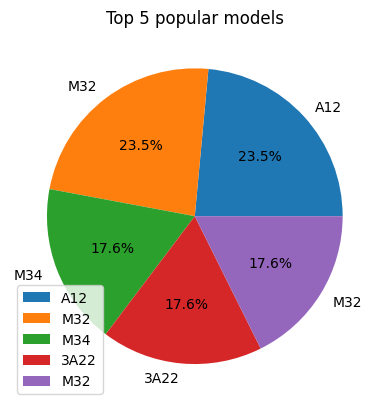

In [ ]:
y=a1
plt.title('Top 5 popular models')
labels=['A12','M32','M34','3A22','M32']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

In [ ]:
b=df.sort_values(by='price',ascending=False)[['name','price']]
b=b.groupby('name')['price'].sum().reset_index()
b1=b.head(10)
b1

,name,price
0,"A03 (Black, 32 GB)",9400
1,"A03 (Blue, 32 GB)",8991
2,"A03 (Blue, 64 GB)",11499
3,"A03 (Red, 32 GB)",18996
4,"A03 Core (Black, 32 GB)",7189
5,"A03 Core (Blue, 32 GB)",8150
6,"A03 Core (Bronze, 32 GB)",7199
7,"A03 Core (Green, 32 GB)",16806
8,"A03 Core (Mint, 32 GB)",7199
9,"A03 Core (Onyx, 32 GB)",6990


[Text(0.5, 1.0, 'Model name vs price')]

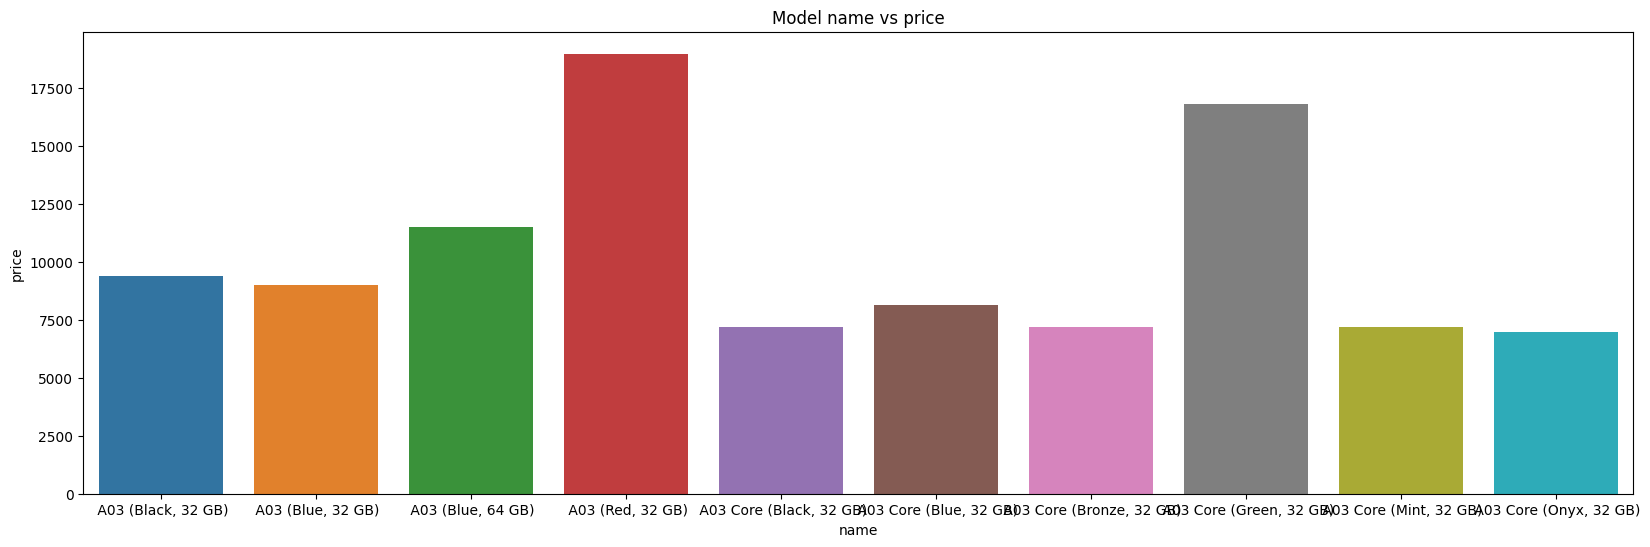

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='name',y='price',data=b1).set(title='Model name vs price')

In [ ]:
c=df.sort_values(by='price',ascending=False)[['camera','price']]
c=c.groupby('camera')['price'].sum().reset_index()
c1=c.head(10)
c1

,camera,price
0,0,13999
1,3,14999
2,5,80386
3,8,120700
4,12,339422
5,13,767165
6,16,41364
7,24,66900
8,25,143699
9,32,209529


[Text(0.5, 1.0, 'Camera vs price')]

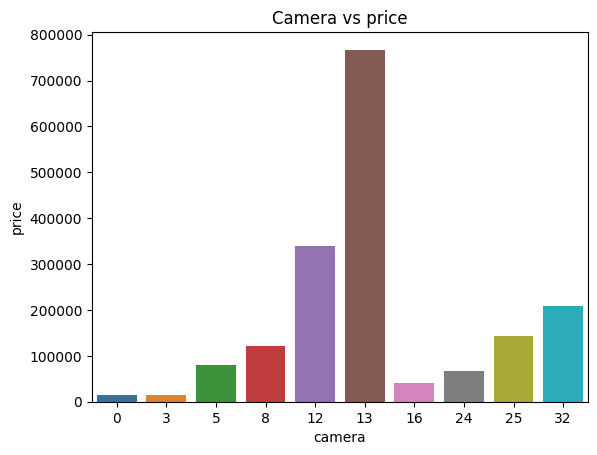

In [ ]:
sns.barplot(x='camera',y='price',data=c1).set(title='Camera vs price')


In [ ]:

# d=df.sort_values(by='price',ascending=False)[['storage','price']]
# d=d.groupby('storage')['price'].sum().reset_index()
# d1=d.head()
# d1


d=df.sort_values(by='storage',ascending=False)[['storage','name']]
d1=d.head(5)
d1

,storage,name
320,512,"Z Fold3 5G (Phantom Black, 512 GB)"
201,256,"Z Fold4 5G (Phantom Black, 256 GB)"
87,256,"S22 Ultra 5G (Phantom Black, 256 GB)"
97,256,"S23 5G (Cream, 256 GB)"
179,256,"S22 ultra 5G (Burgundy, 256 GB)"


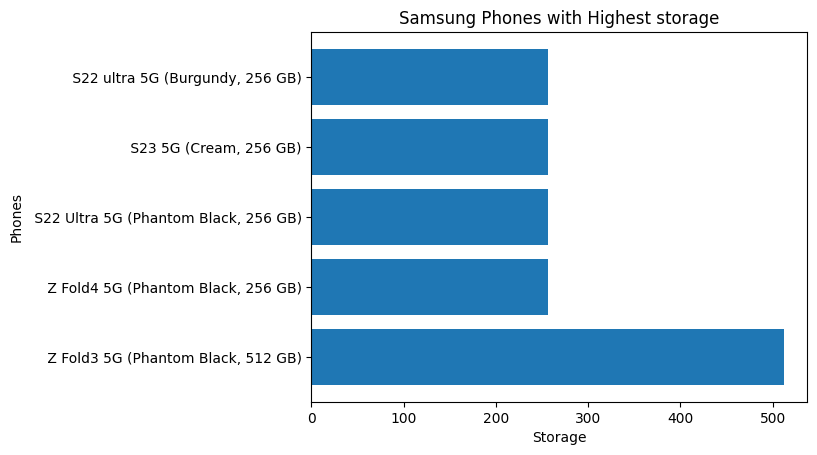

In [ ]:
plt.barh(y='name', width='storage',data=d1)
plt.title('Samsung Phones with Highest storage')
plt.xlabel('Storage')
plt.ylabel('Phones')
plt.show()

In [ ]:
#label encoding
le=LabelEncoder()
lst=['name','android_version','display','processor']
for i in lst:
    df[i]=le.fit_transform(df[i])

<Axes: >

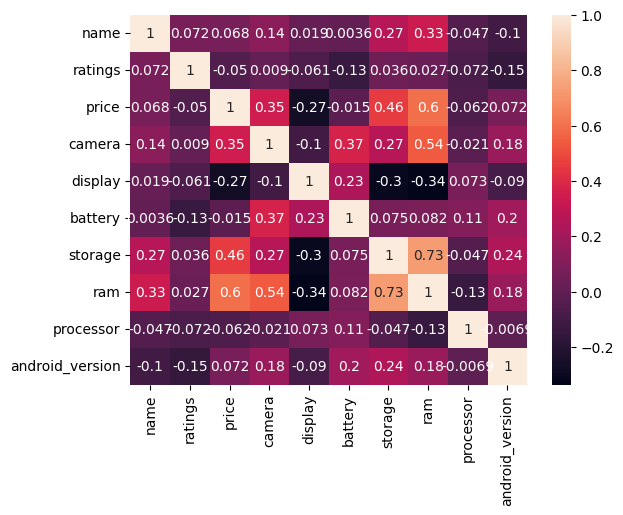

In [ ]:
sns.heatmap(df.corr(),annot=True)


In [ ]:
df.drop(['imgURL','ratings'],axis=1,inplace=True)

In [ ]:
X=df.drop(['price'],axis=1)
y1=df['price']

In [ ]:
X

,name,camera,display,battery,storage,ram,processor,android_version
0,132,50,4,6000,64,4,22,9
1,133,50,4,6000,128,4,22,9
2,129,50,4,6000,128,4,22,9
3,131,50,4,6000,128,4,22,9
4,142,50,4,5000,128,6,20,9
...,...,...,...,...,...,...,...,...
402,222,32,4,3500,128,6,22,6
403,76,25,4,4000,64,4,22,9
404,160,13,4,3300,32,2,14,5
405,171,13,4,4000,32,3,9,6


# **4. Data Scaling and Model Building**

In [ ]:
#scaling using standard scaler
ms=MinMaxScaler()
X_ms=ms.fit_transform(X)
X_ms

array([[0.42718447, 0.25      , 1.        , ..., 0.27272727, 1.        ,
        0.9       ],
       [0.43042071, 0.25      , 1.        , ..., 0.27272727, 1.        ,
        0.9       ],
       [0.41747573, 0.25      , 1.        , ..., 0.27272727, 1.        ,
        0.9       ],
       ...,
       [0.51779935, 0.065     , 1.        , ..., 0.09090909, 0.63636364,
        0.5       ],
       [0.55339806, 0.065     , 1.        , ..., 0.18181818, 0.40909091,
        0.6       ],
       [0.802589  , 0.25      , 1.        , ..., 0.63636364, 1.        ,
        0.9       ]])

In [ ]:
#Performing train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_ms,y1,test_size=0.2,random_state=0)

In [ ]:
#model building using Multiple regression
mlr=LinearRegression()
mlr.fit(X_train,y_train)
y_pred=mlr.predict(X_test)
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 4299.862700697345
mean squared error: 34152185.071607955
root mean squared error: 5843.987086878953
r2-score: 0.3027710264069913


In [ ]:

# Lasso Regression
from sklearn.linear_model import Lasso



lasso=Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2score=r2_score(y_test, y_pred)
print("mean_squared_error", mse)
print("mean_absolute_error", mae)
print("R2_Score", r2score)



mean_squared_error 34093812.70420938
mean_absolute_error 4297.85930154286
R2_Score 0.30396271899480565


In [ ]:

# Ridge Regression
from sklearn.linear_model import Ridge


ridge=Ridge()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2score=r2_score(y_test, y_pred)
print("mean_squared_error", mse)
print("mean_absolute_error", mae)
print("R2_Score", r2score)


mean_squared_error 33468205.19159184
mean_absolute_error 4278.5198931877385
R2_Score 0.3167347182967487


In [ ]:
y_new=mlr.predict(ms.transform([[152,50,4,6000,128,6,22,12]]))
y_new

array([17284.0884836])

# **5. Pickle Export and evaluation**

In [ ]:
import pickle
pickle.dump(mlr, open("samsungtrain.pkl", "wb"))
pickle.dump(lasso, open("samsung_lr.pkl","wb"))
pickle.dump(ridge, open("samsung_ridge.pkl","wb"))

In [ ]:
predict_value = ms.transform([[152,50,4,6000,128,6,22,12]])
linear_pkl = pickle.load(open('/content/samsungtrain.pkl', 'rb'))
print("Linear:")
preditction_value = linear_pkl.predict(predict_value)
print(preditction_value)


lasso_pkl = pickle.load(open('/content/samsung_lr.pkl','rb'))
print("Lasso:")
preditction_value = lasso_pkl.predict(predict_value)
print(preditction_value)


ridge_pkl = pickle.load(open('/content/samsung_ridge.pkl','rb'))
print("Ridge:")
preditction_value = ridge_pkl.predict(predict_value)
print(preditction_value)

Linear:
[17284.0884836]
Lasso:
[17304.15227709]
Ridge:
[17411.75138165]
